In [1]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap
import queue

In [2]:
mazeOri = open("maze.txt", "r") #a file of 2601 row with each row having a single boolean value 
matrix = []
for i in range(51):
    row = []
    for j in range(51):
        value = mazeOri.readline() #remove the newline character
        row.append(value)
    matrix.append(row) #create a matrix of 51*51 
    
print(type(matrix[1][1])) #assess if the condition paramter used below is string or boolean value 

for i in range(len(matrix)):
    for j in range(len(matrix[i])):
        if matrix[i][j] == "True\n":
            matrix[i][j] = 1
        else:
            matrix[i][j] = 0
        
print(matrix)
mazeGrid = np.array(matrix)

<class 'str'>
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], [1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1], [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], [1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1], [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 

In [3]:
def showBinaryMaze(mazemap):
    (height, width) = mazemap.shape 
    #mazemap = mazemap * 255 #scales from 0 and 1 to 0
    f = plt.figure(figsize = (width, height))
    heatmap(mazemap, vmin = 0, vmax = 1, cmap = "Greys", cbar = False)

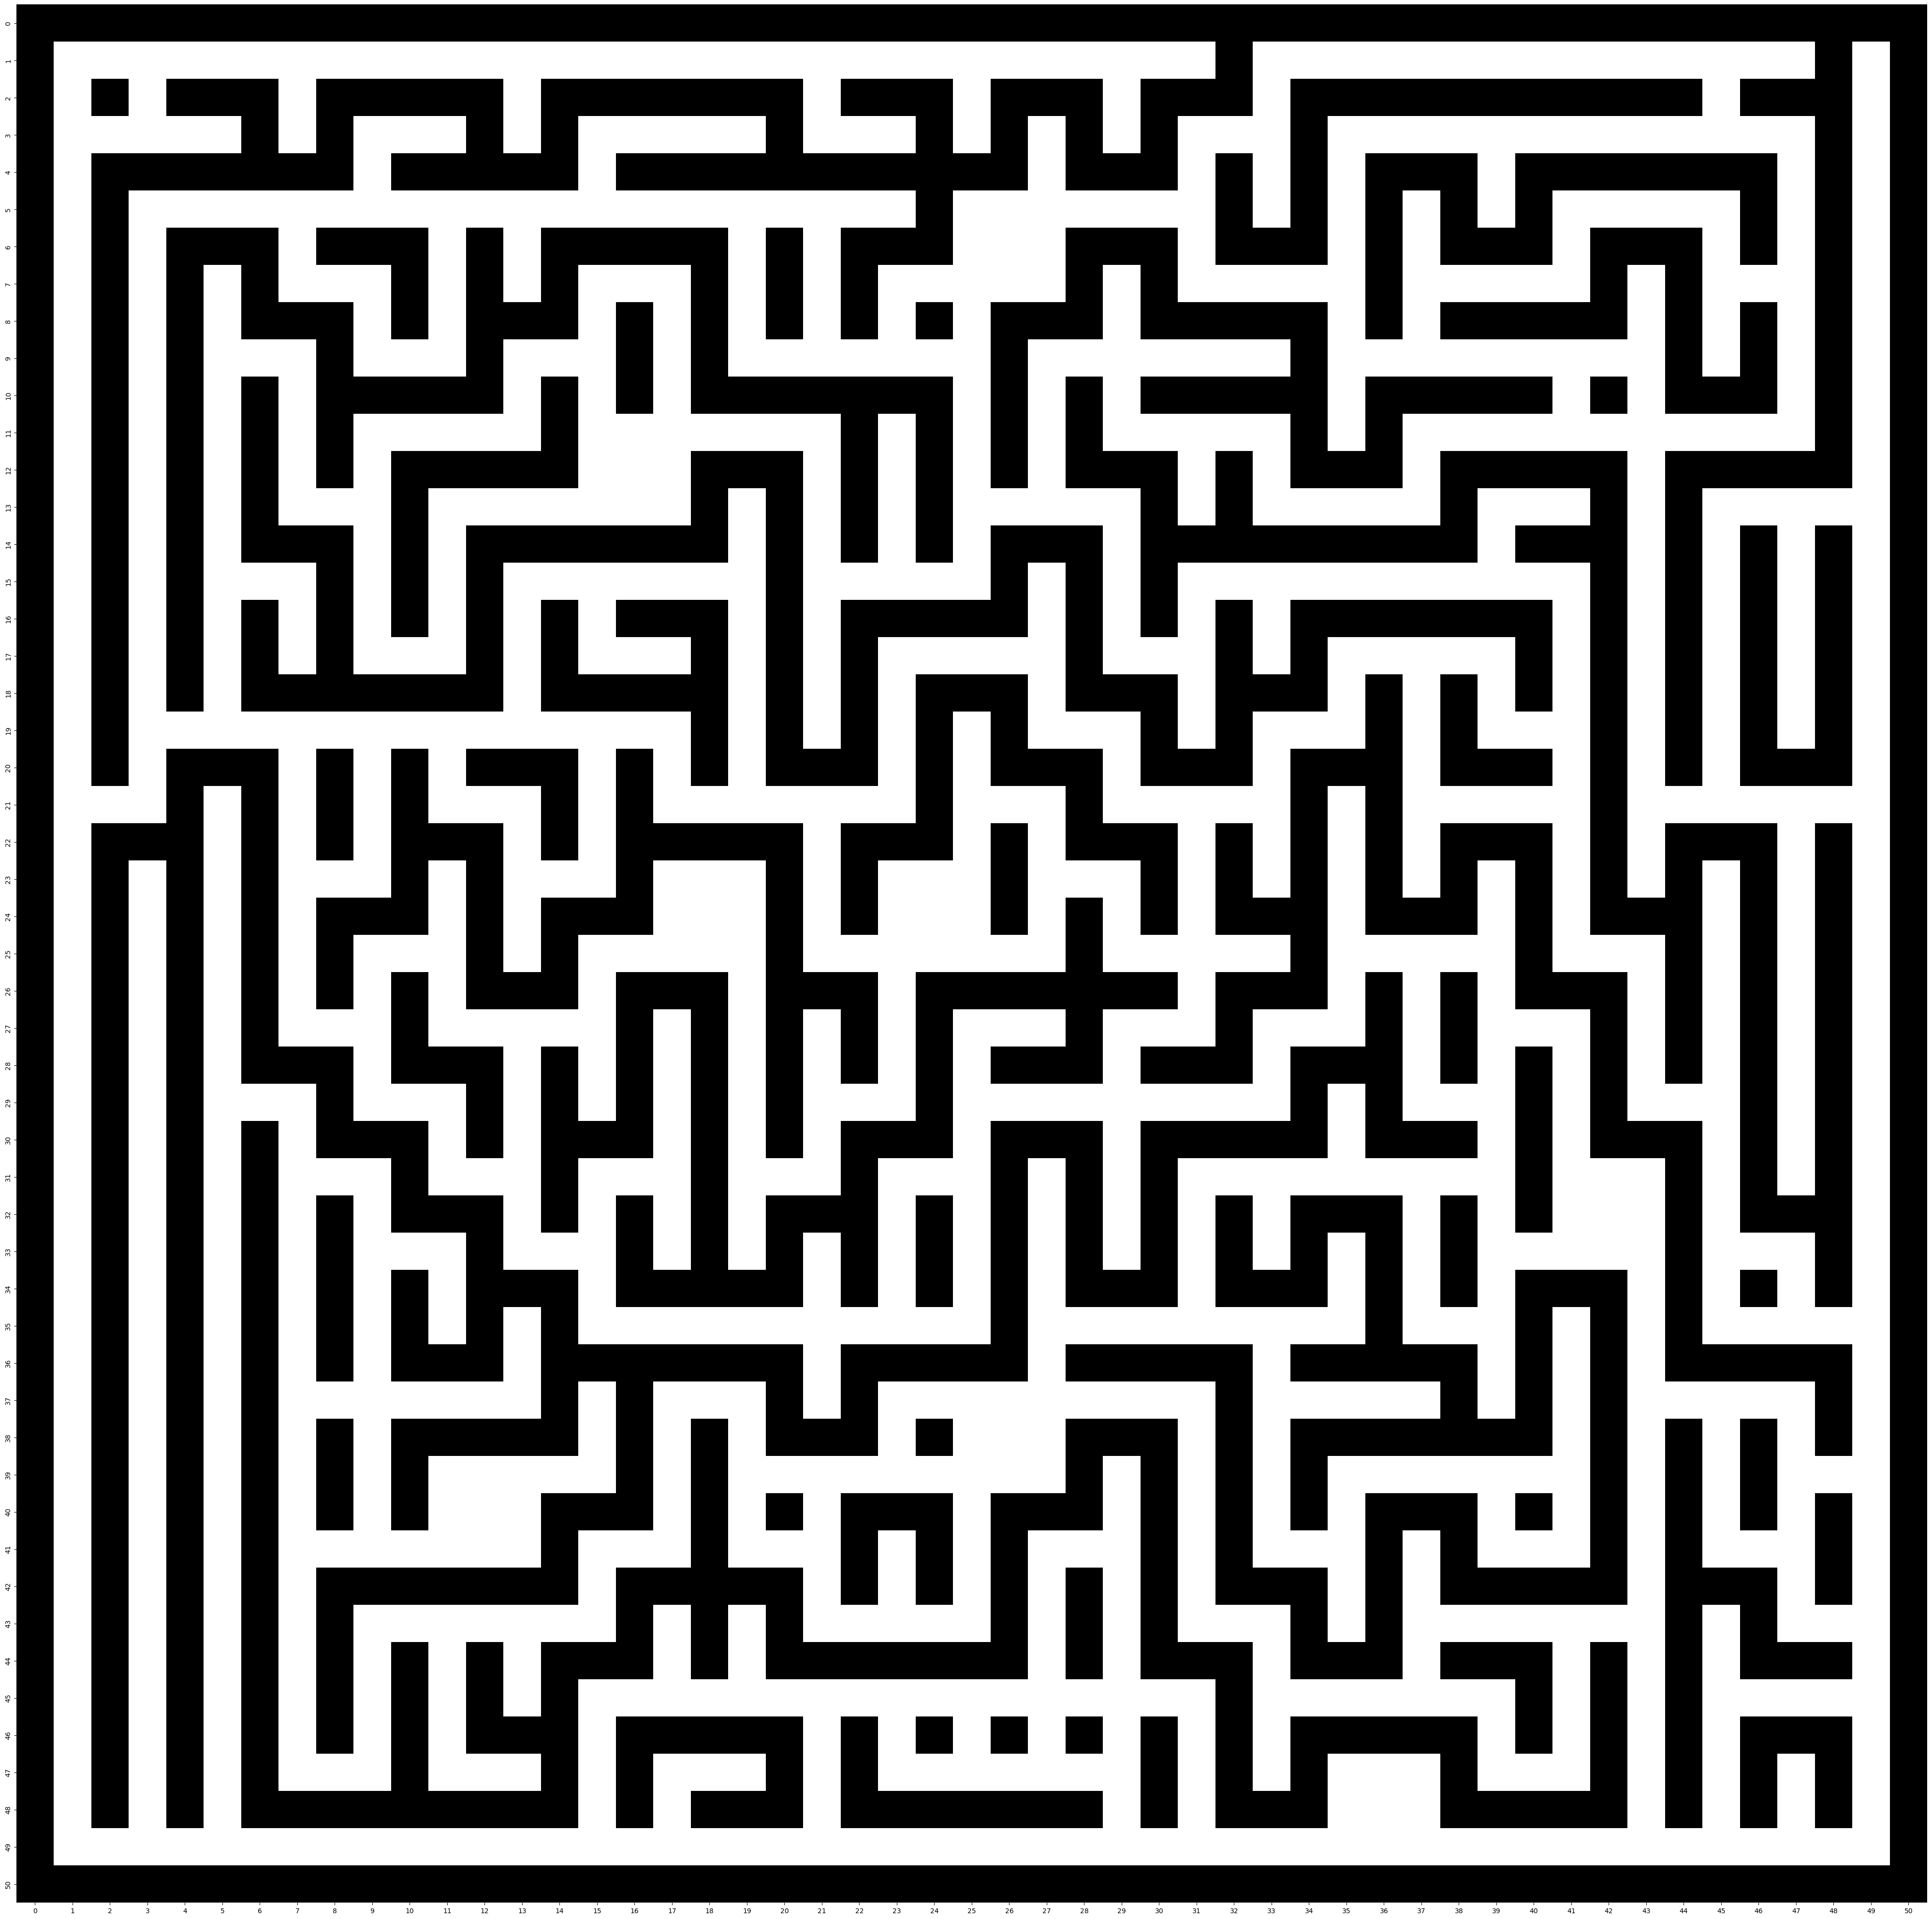

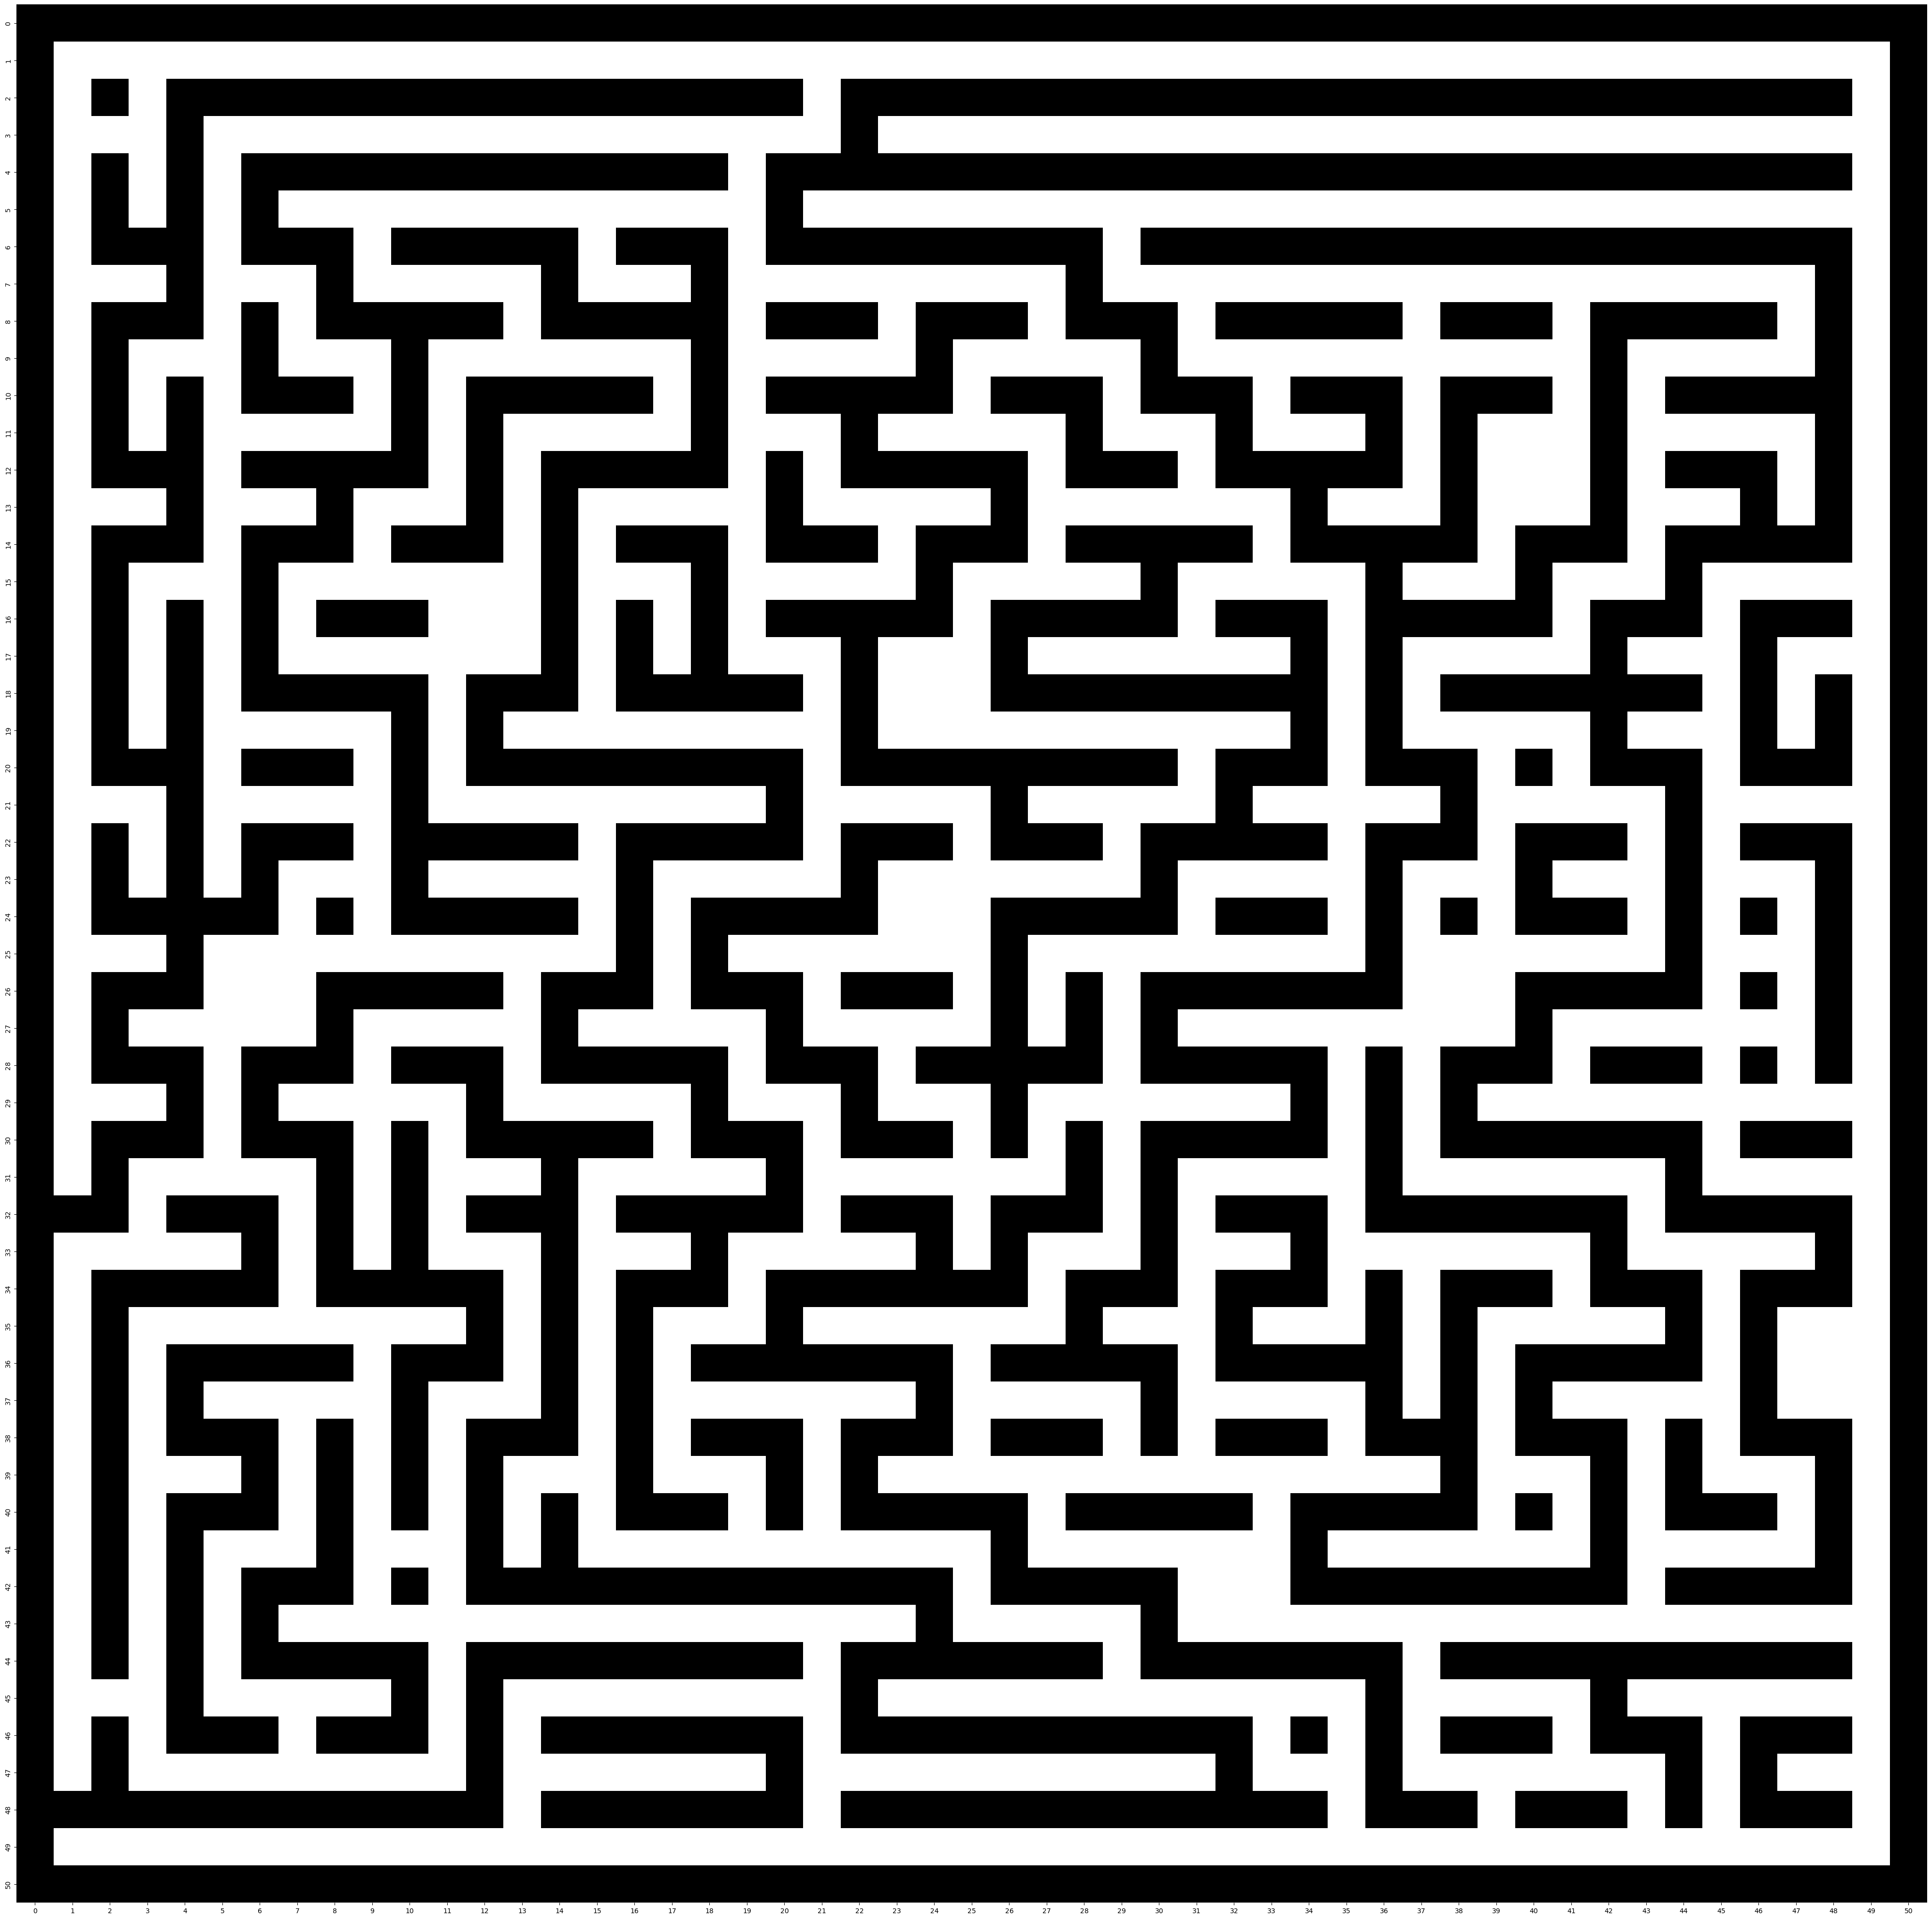

In [4]:
showBinaryMaze(mazeGrid)
matrix2 = []
for i in range(51):
    row = []
    for j in range(51):
        value2 = matrix[j][i]
        row.append(value2)
    matrix2.append(row)

mazeGrid2 = np.array(matrix2)
showBinaryMaze(mazeGrid2)

In [5]:
def showMazeProblem(maze, start, end):
    (height, width) = maze.shape
    maze = maze * 255
    maze[start[0]][start[1]]=150
    maze[end[0]][end[1]]=80
    f = plt.figure(figsize = (width,height))
    heatmap(maze,  cmap = "YlGnBu", cbar = True)

Please insert the starting location separated by comma: 21, 33


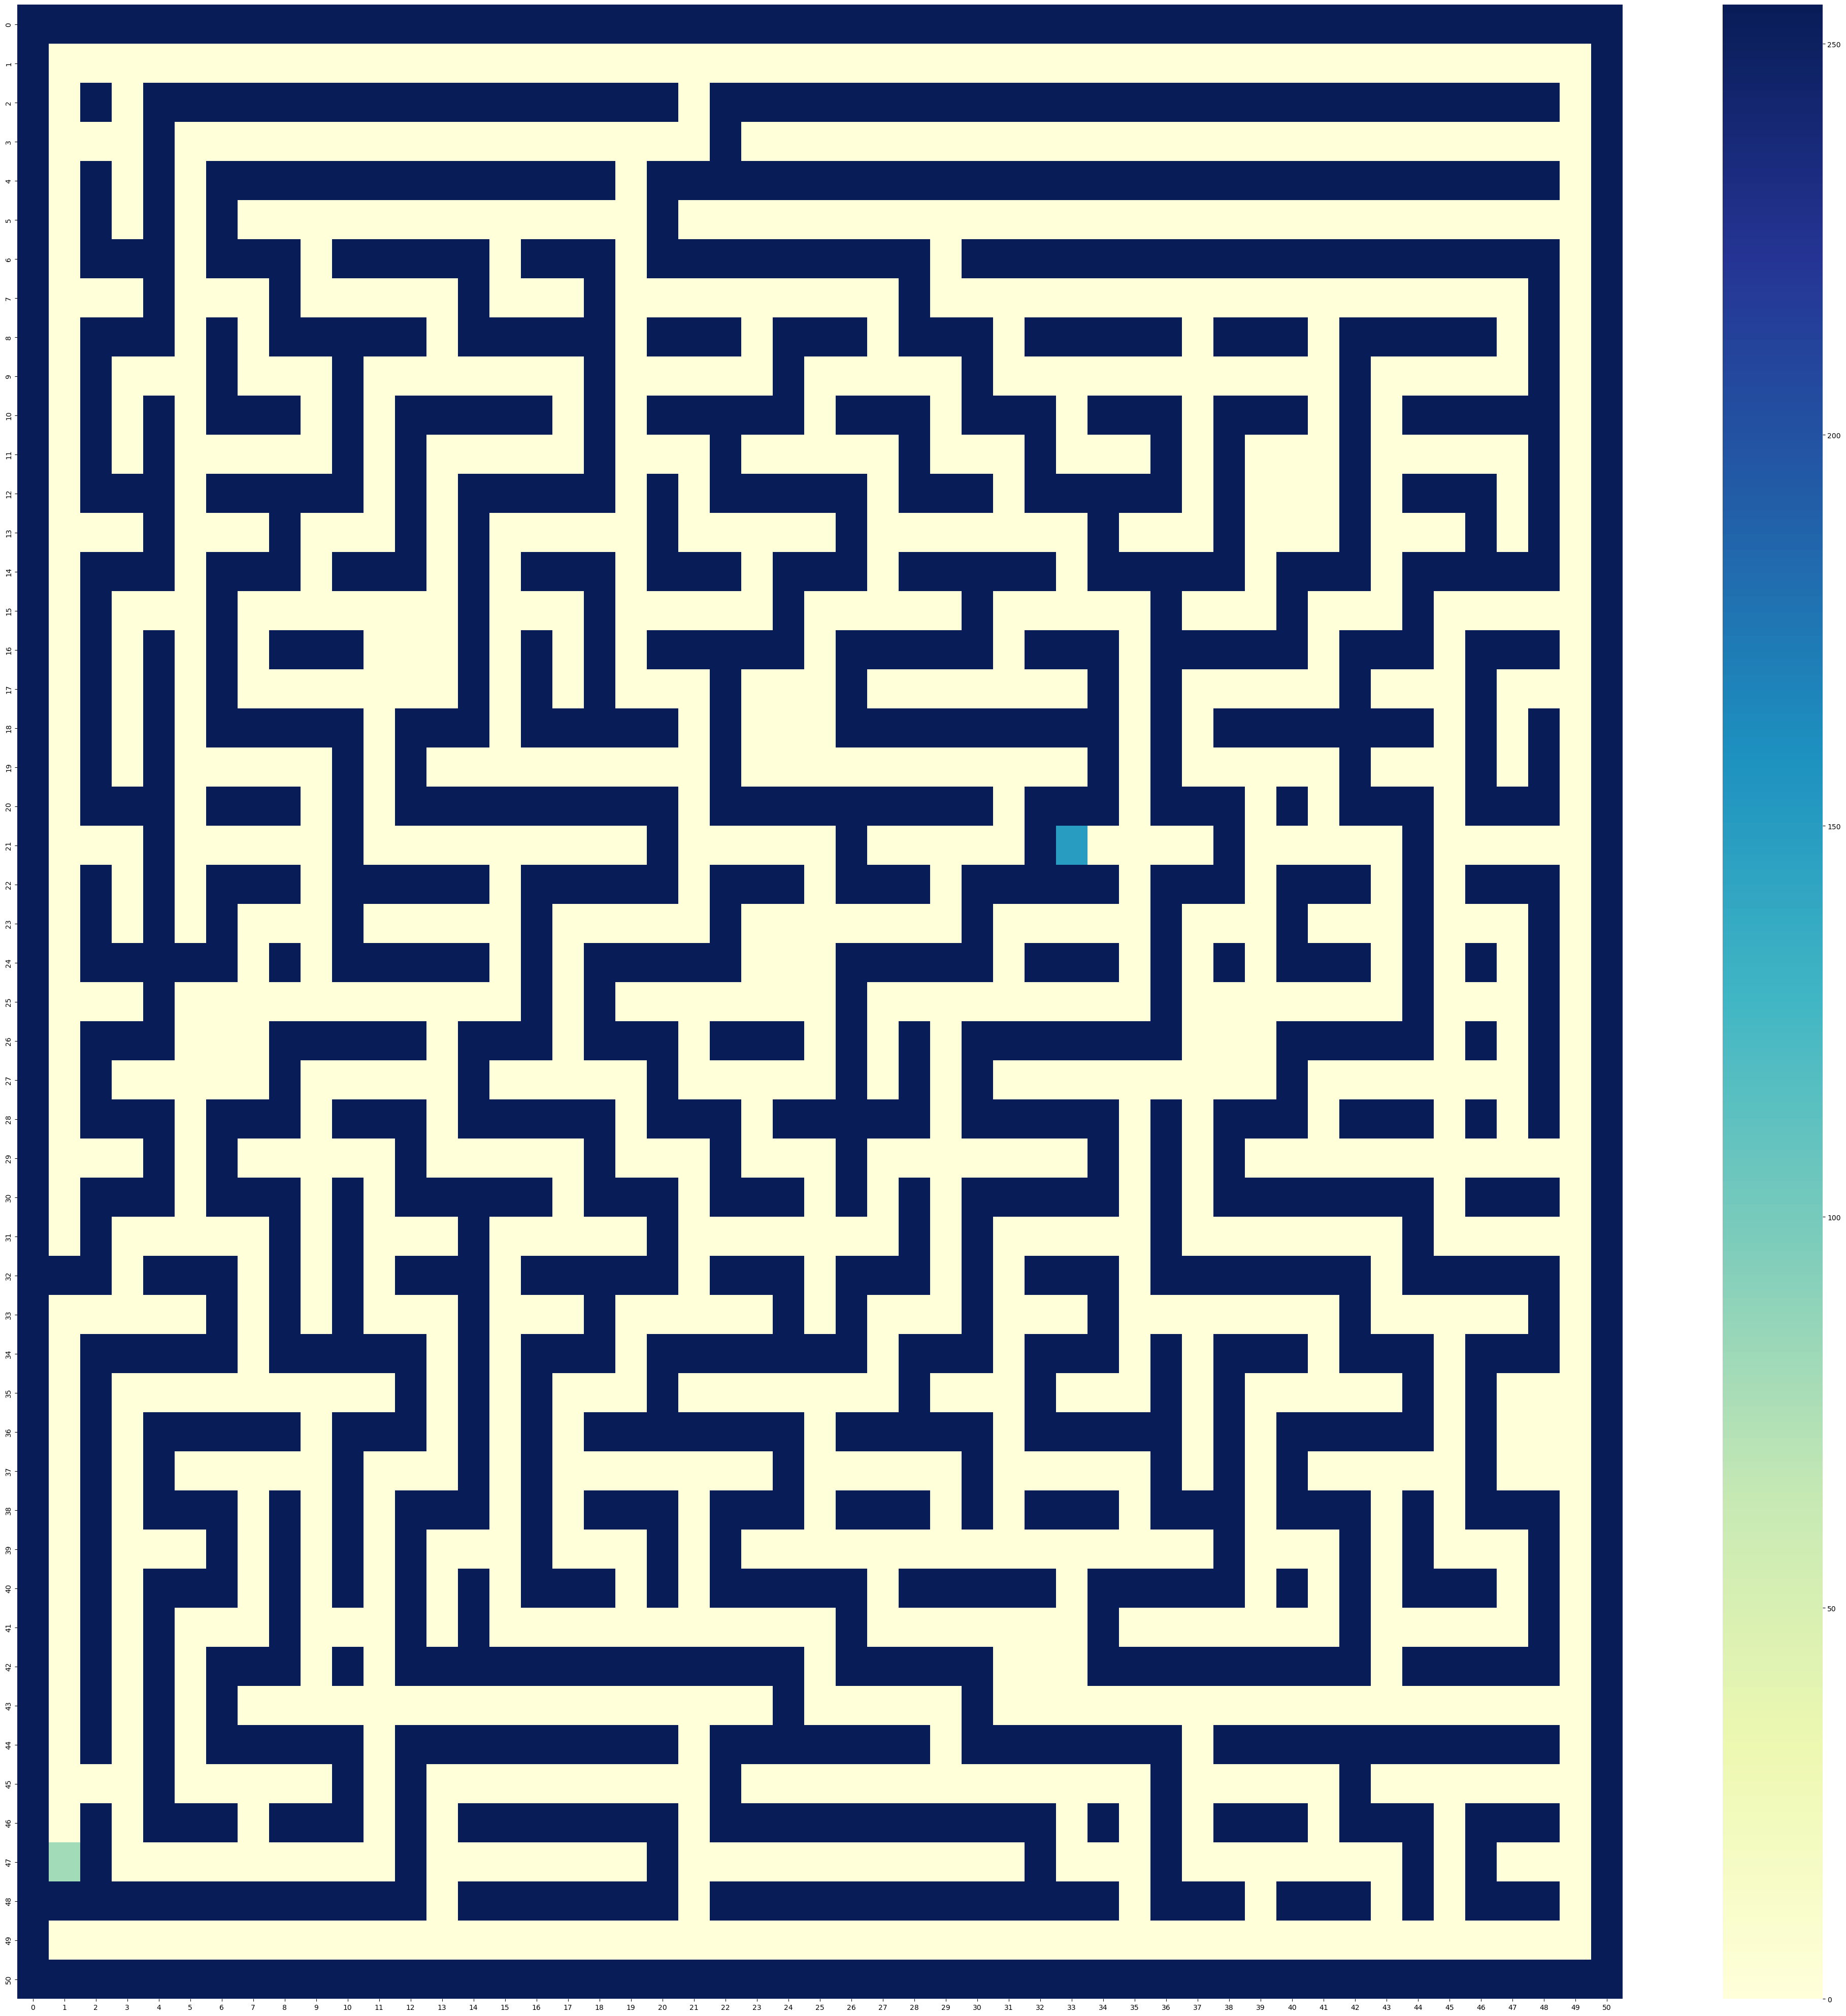

In [35]:
Start = list(input("Please insert the starting location separated by comma: ").split(","))
Start[0], Start[1]=int(Start[0]), int(Start[1])
Start = tuple(Start)
Goal = (47, 1)
showMazeProblem(mazeGrid2, Start, Goal)

In [38]:
def heuristic (nodeA, nodeB):
    (xA, yA) = nodeA
    (xB, yB) = nodeB
    distance = abs(xA-xB) + abs(yA-yB)
    return distance

def neighbors(maze, node):
    x, y = node[0], node[1]
    neighbors = []
    if 0 <= x+1 <= len(maze[y]) and 0 <= y <= len(maze) and maze[x][y] == 0:
        neighbors.append((x+1, y))
    if 0 <= x-1 <= len(maze[y]) and 0 <= y <= len(maze) and maze[x][y] == 0:
        neighbors.append((x-1, y))
    if 0 <= x <= len(maze[y]) and 0 <= y+1 <= len(maze) and maze[x][y] == 0:
        neighbors.append((x, y+1))
    if 0 <= x <= len(maze[y]) and 0 <= y-1 <= len(maze) and maze[x][y] == 0:
        neighbors.append((x, y-1))
    return neighbors
        
        
def Search (maze, start, goal):
    
    frontier = queue.PriorityQueue()
    frontier.put((0, start))
    parent = {}
    parent[start] = None
    pathcost = {start: 0}
    processed = 0 
    
    while not frontier.empty():
        currentNode = frontier.get()[1]
        processed = processed + 1
        
        if currentNode == goal:
            break 
            
        for neighbor in neighbors(maze, currentNode):
            new_cost = pathcost[currentNode] + 1 
            if neighbor not in parent or new_cost < pathcost[neighbor]:
                pathcost[neighbor] = new_cost
                priority = new_cost + heuristic(neighbor, goal)
                frontier.put((priority, neighbor))
                parent[neighbor] = currentNode
        
    return parent, pathcost, processed

def pathfinding(parent, start, goal):
    path = []
    currentNode = goal
    
    while currentNode != start:
        path.append(currentNode)
        currentNode = parent[currentNode]
        

    path.reverse()
    path.pop()
    
    return path

ExploredNodes,ExploredPathCost, ProcessedNodes = Search(mazeGrid2, Start, Goal)
PathFound = pathfinding(ExploredNodes, Start, Goal)

Number of Nodes explored: 1481
Shortest distance:  101
Total nodes visited:  1415


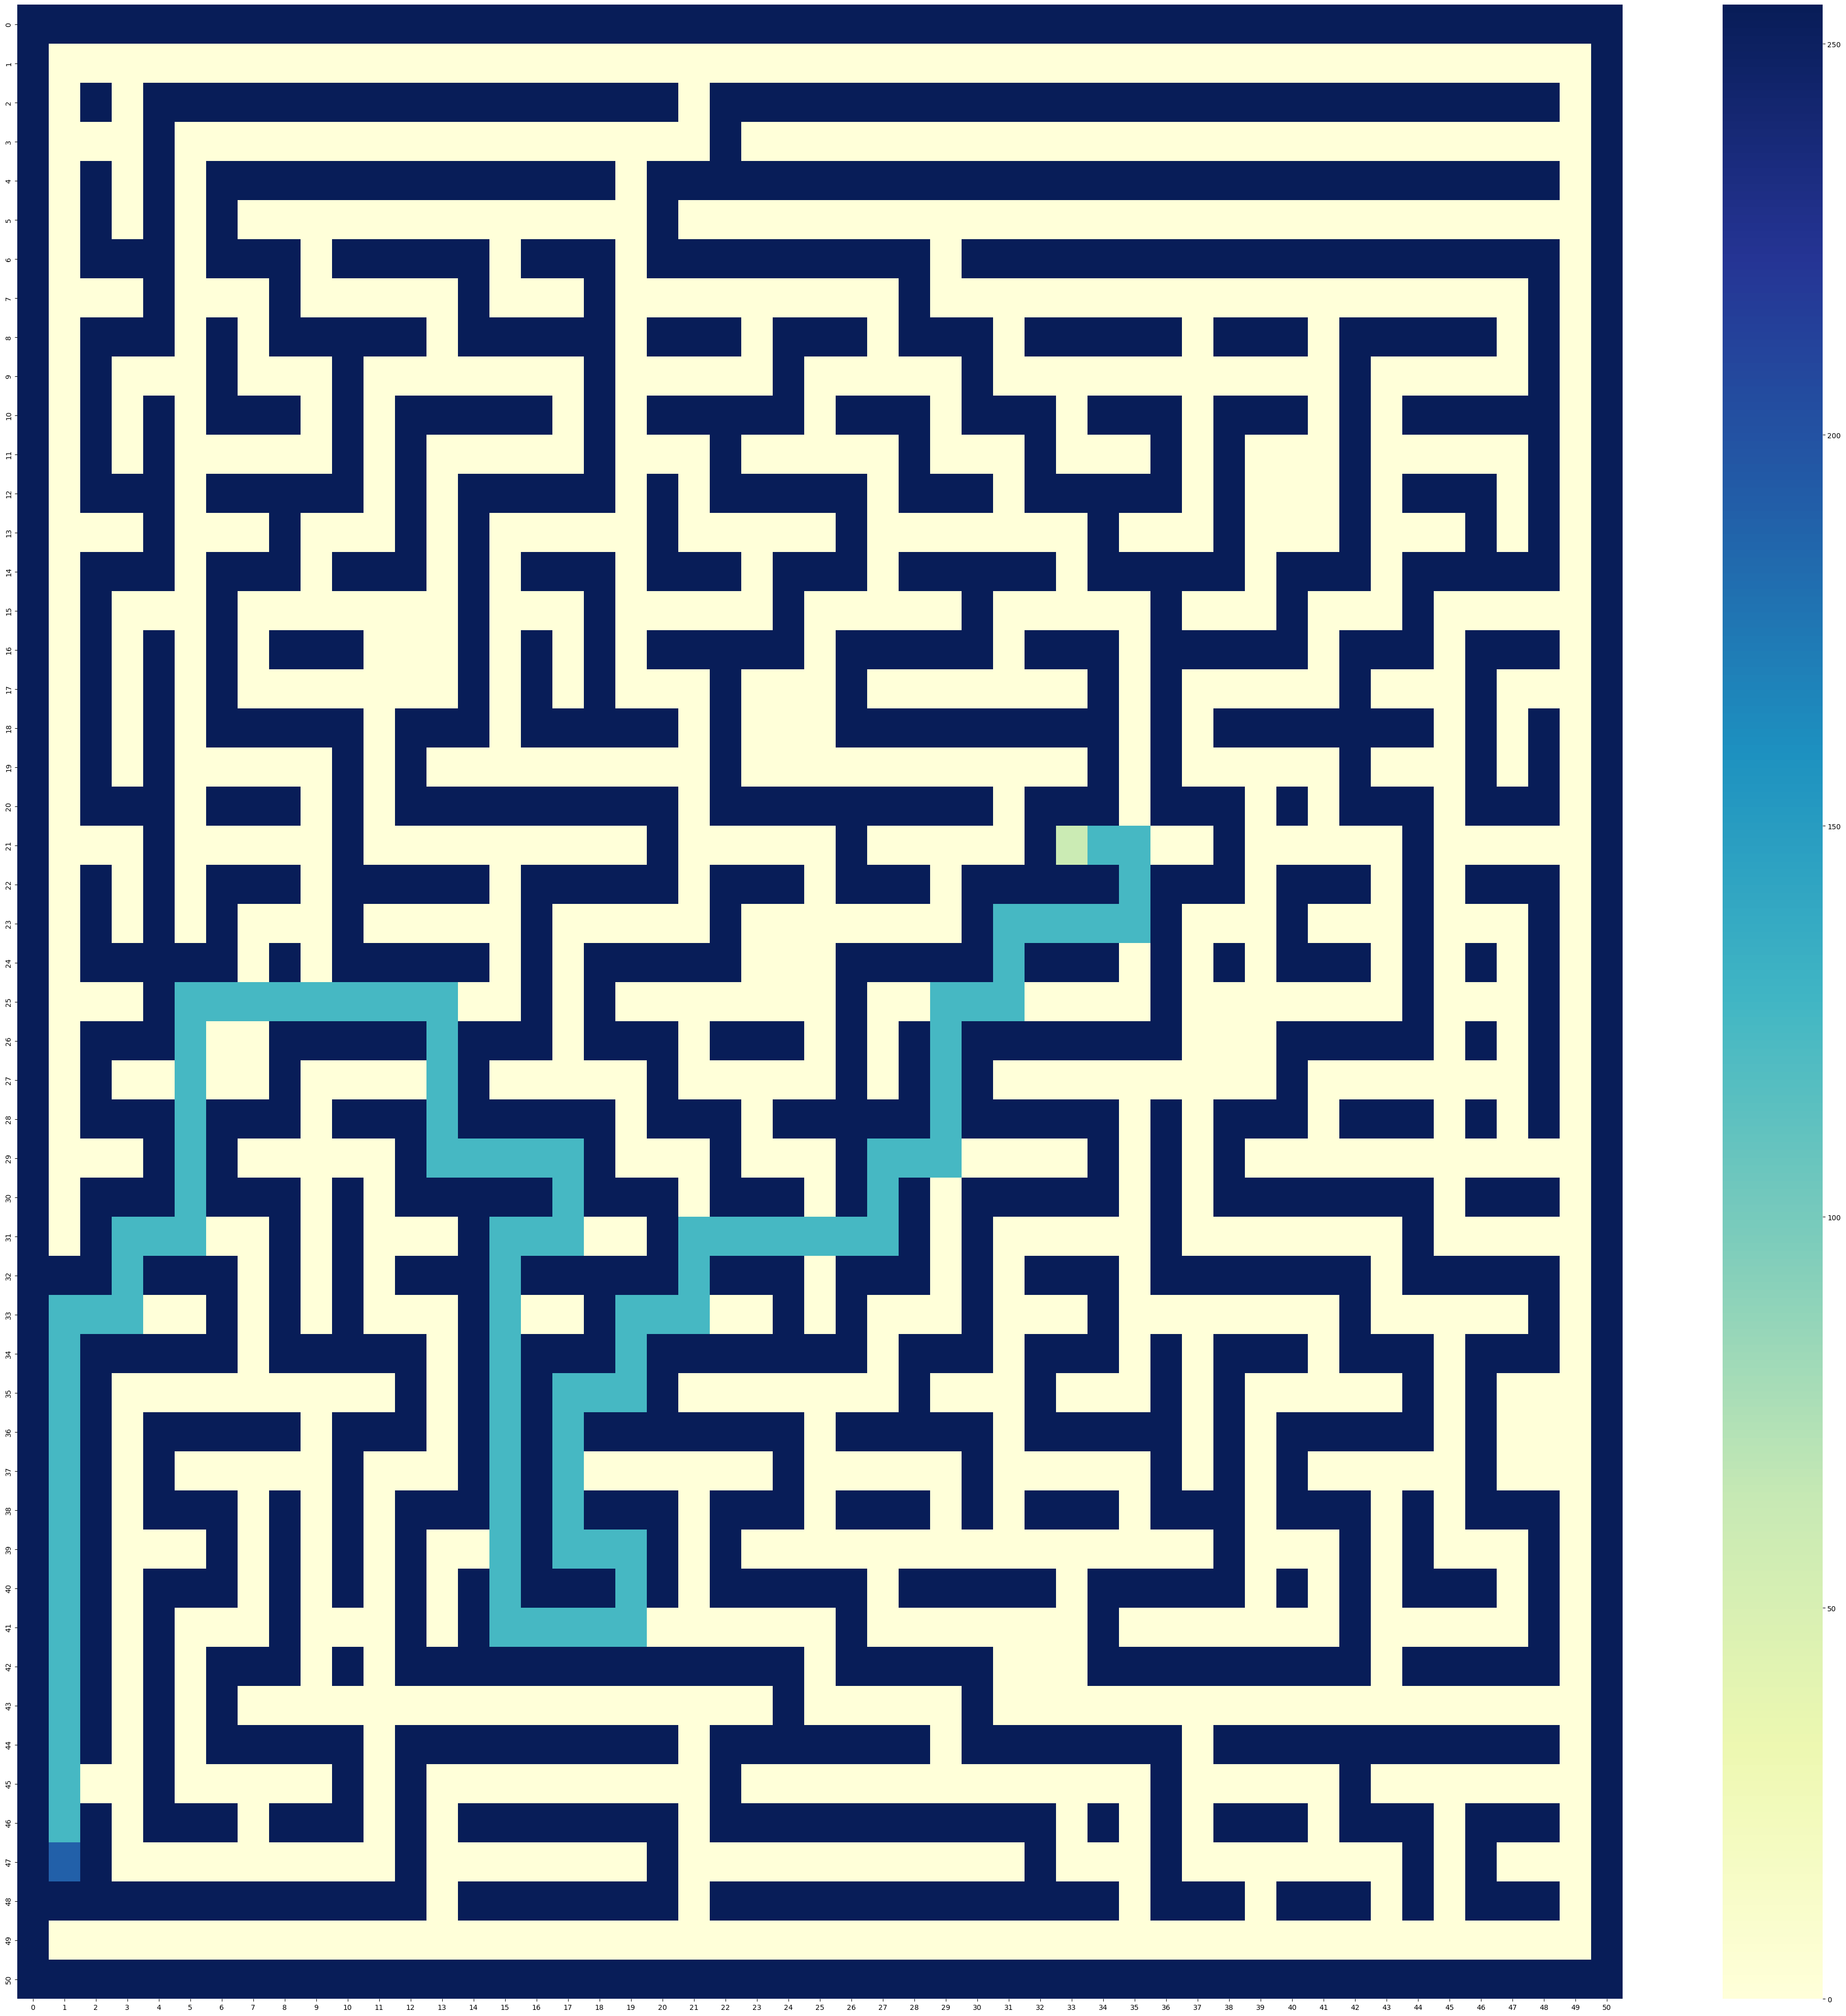

In [37]:
def ShowMazePath(maze, path, start, goal):
    height, width = maze.shape
    maze = maze * 255 
    maze[start[0]][start[1]]=60
    maze[goal[0]][goal[1]]=190
    
    for node in path:
        maze[node[0]][node[1]] = 125
    
    f = plt.figure(figsize = (width,height))
    heatmap(maze,  cmap = "YlGnBu", cbar = True)


print("Number of Nodes explored:", len(ExploredNodes))
print("Total nodes visited: ", ProcessedNodes)
print("Shortest distance: ", len(PathFound))
ShowMazePath(mazeGrid2, PathFound, Start, Goal)
